In [1]:
%matplotlib inline


# Measure region properties


This example shows how to measure properties of labelled image regions. We
analyze an image with two ellipses.


ISIC_6177698_seg.jpg


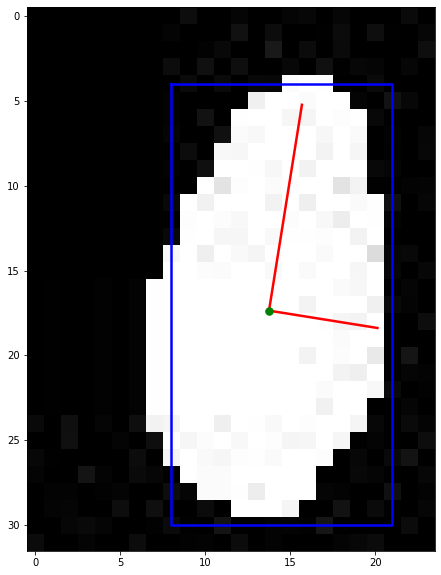

In [652]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
from skimage.io import imsave

from root.utils import readImage, centerImage, displayImage

input_path = '../data/output/seg/128/'
img_name = random.sample(os.listdir(input_path), 1)[0]
print(img_name)

image = readImage(input_path + img_name)
image = centerImage(image)

label_img = label(image)
regions = regionprops(label_img)




fig, ax = plt.subplots(figsize= (10, 10))
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

#plt.savefig('/home/giuliano/Pictures/propiedades2.jpg')
plt.show()

We use the :py:func:`skimage.measure.regionprops` result to draw certain
properties on each region. For example, in red, we plot the major and minor
axes of each ellipse.



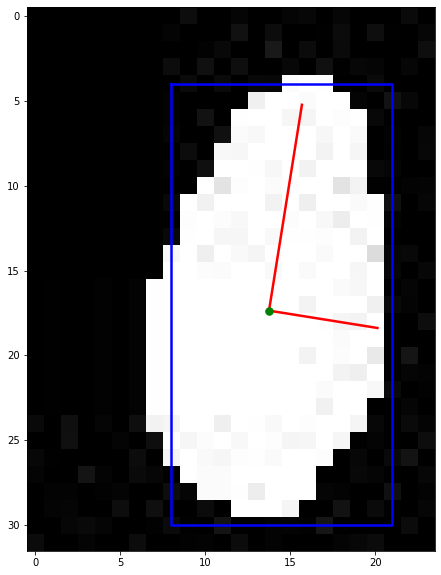

ISIC_6177698_seg.jpg


In [653]:
fig, ax = plt.subplots(figsize= (10, 10))
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

#plt.savefig('/home/giuliano/Pictures/propiedades3.jpg')
plt.show()
print(img_name)

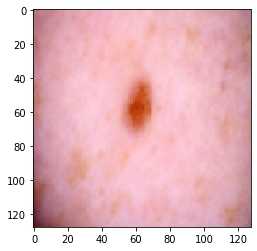

In [654]:
from root.utils import displayImage, resize
displayImage(resize(readImage('../data/input/jpeg/train/' + img_name[:-8] + '.jpg'), (128, 128)))

We use the :py:func:`skimage.measure.regionprops_table` to compute
(selected) properties for each region. Note that
``skimage.measure.regionprops_table`` actually computes the properties,
whereas ``skimage.measure.regionprops`` computes them when they come in use
(lazy evaluation).



In [657]:
props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'major_axis_length',
                                                 'minor_axis_length',
                                                'bbox'))

We now display a table of these selected properties (one region per row),
the ``skimage.measure.regionprops_table`` result being a pandas-compatible
dict.



In [658]:
pd.DataFrame(props)

,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length,bbox-0,bbox-1,bbox-2,bbox-3
0,17,13,-0.158602,24.542688,12.92773,4,8,30,21


In [661]:
type(props)

dict